In [1]:
import Ab as ab
import datetime as dt



# Get data from yahoo finance
sd = dt.datetime(2001,1,1)
ed = dt.datetime(2023,3,2)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
#nasdaq stocks above 200 day moving average percentage

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)

tqqq= ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
def sliding_test(ticker: ab.StockData, indicator:ab.StockData, stg:ab.Strategy, window: int, inc: int, sd: dt.datetime, ed: dt.datetime, run_strategy: bool = True):
    delta = ed - sd
    result = []
    for i in range(0, delta.days + 1, inc):
        sd_5y = sd + dt.timedelta(days=i)
        ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=window)
        
        if run_strategy:
            stg.run_strategy(indicator, sd_5y, ed_5y)
        bt = None
        bt = ab.BackTest(sd_5y, ed_5y,1)
        bt.run_backtest(stg, ticker)
        
        result.append([ed_5y,bt.balance.iloc[-1]['Total']])
        print(result[-1])
        
    return result



In [3]:
test_sd = dt.datetime(2011,3,1)
test_ed = dt.datetime(2018,3,1)
window = 365*5
inc = 21
bts = []
ticker = tqqq
indicator = naa200r

In [4]:
buy_and_hold = ab.BuyAndHold()
bh_result = sliding_test(ticker, ticker, buy_and_hold, window, inc, test_sd, test_ed, True)
bts.append([bh_result, buy_and_hold.name])

[datetime.datetime(2016, 2, 28, 0, 0), 4.191876158314093]
[datetime.datetime(2016, 3, 20, 0, 0), 5.094514861102998]
[datetime.datetime(2016, 4, 10, 0, 0), 5.055034903464967]
[datetime.datetime(2016, 5, 1, 0, 0), 4.091902627014638]
[datetime.datetime(2016, 5, 22, 0, 0), 4.663197182909845]
[datetime.datetime(2016, 6, 12, 0, 0), 5.3603389792252605]
[datetime.datetime(2016, 7, 3, 0, 0), 4.47479196456686]
[datetime.datetime(2016, 7, 24, 0, 0), 4.855027844455583]
[datetime.datetime(2016, 8, 14, 0, 0), 7.523351614509505]
[datetime.datetime(2016, 9, 4, 0, 0), 7.913496446798397]
[datetime.datetime(2016, 9, 25, 0, 0), 7.356381095190712]
[datetime.datetime(2016, 10, 16, 0, 0), 6.2787286476673305]
[datetime.datetime(2016, 11, 6, 0, 0), 5.533797921928401]
[datetime.datetime(2016, 11, 27, 0, 0), 8.098332402952812]
[datetime.datetime(2016, 12, 18, 0, 0), 7.649377843624251]
[datetime.datetime(2017, 1, 8, 0, 0), 7.261744948295052]
[datetime.datetime(2017, 1, 29, 0, 0), 7.027938695260119]
[datetime.date

In [5]:
naa200r_40_stg = ab.Threshold('NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window = 40)
naa200r_40_stg_result = sliding_test(ticker, indicator, naa200r_40_stg, window, inc, test_sd,test_ed, True)
bts.append([naa200r_40_stg_result, naa200r_40_stg.name])



[datetime.datetime(2016, 2, 28, 0, 0), 3.130663187165125]
[datetime.datetime(2016, 3, 20, 0, 0), 3.5288400538973295]
[datetime.datetime(2016, 4, 10, 0, 0), 3.775305157983817]
[datetime.datetime(2016, 5, 1, 0, 0), 3.0559988978804]
[datetime.datetime(2016, 5, 22, 0, 0), 3.4826648506952584]
[datetime.datetime(2016, 6, 12, 0, 0), 4.003318628510254]
[datetime.datetime(2016, 7, 3, 0, 0), 3.3419561896900123]
[datetime.datetime(2016, 7, 24, 0, 0), 2.8402685593324333]
[datetime.datetime(2016, 8, 14, 0, 0), 3.9670363128896513]
[datetime.datetime(2016, 9, 4, 0, 0), 5.17053960812026]
[datetime.datetime(2016, 9, 25, 0, 0), 5.134849663179769]
[datetime.datetime(2016, 10, 16, 0, 0), 4.73091457633062]
[datetime.datetime(2016, 11, 6, 0, 0), 4.398046562680085]
[datetime.datetime(2016, 11, 27, 0, 0), 6.355923875391884]
[datetime.datetime(2016, 12, 18, 0, 0), 5.605138592555211]
[datetime.datetime(2017, 1, 8, 0, 0), 5.599670987199052]
[datetime.datetime(2017, 1, 29, 0, 0), 5.726226933345777]
[datetime.date

In [6]:
naa200r_20_stg = ab.Threshold('NAA200R', buy_threshold = 15, sell_threshold = 30)
naa200r_20_stg_result = sliding_test(ticker, indicator, naa200r_20_stg,window, inc, test_sd,test_ed, True)
bts.append([naa200r_20_stg_result, naa200r_20_stg.name])

[datetime.datetime(2016, 2, 28, 0, 0), 3.592576341551472]
[datetime.datetime(2016, 3, 20, 0, 0), 4.049502144697529]
[datetime.datetime(2016, 4, 10, 0, 0), 3.922050839729715]
[datetime.datetime(2016, 5, 1, 0, 0), 3.506895722715578]
[datetime.datetime(2016, 5, 22, 0, 0), 3.9965140291857115]
[datetime.datetime(2016, 6, 12, 0, 0), 4.406096283980746]
[datetime.datetime(2016, 7, 3, 0, 0), 3.8350445333129946]
[datetime.datetime(2016, 7, 24, 0, 0), 4.160919243038824]
[datetime.datetime(2016, 8, 14, 0, 0), 5.155983536850587]
[datetime.datetime(2016, 9, 4, 0, 0), 5.950936372534114]
[datetime.datetime(2016, 9, 25, 0, 0), 6.535517458918974]
[datetime.datetime(2016, 10, 16, 0, 0), 5.140311145826799]
[datetime.datetime(2016, 11, 6, 0, 0), 5.0302169889530575]
[datetime.datetime(2016, 11, 27, 0, 0), 6.899682871880392]
[datetime.datetime(2016, 12, 18, 0, 0), 6.977001113093131]
[datetime.datetime(2017, 1, 8, 0, 0), 6.407507691168752]
[datetime.datetime(2017, 1, 29, 0, 0), 6.495279704784253]
[datetime.da

In [7]:
ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.00, sell_threshold = 1)
ma_threshold_result = sliding_test(ticker,indicator, ma_threshold,window, inc, test_sd,test_ed, True)
bts.append([ma_threshold_result, ma_threshold.name])


[datetime.datetime(2016, 2, 28, 0, 0), 2.0446059041329185]
[datetime.datetime(2016, 3, 20, 0, 0), 2.2146332768415364]
[datetime.datetime(2016, 4, 10, 0, 0), 2.08070096548784]
[datetime.datetime(2016, 5, 1, 0, 0), 1.684266460925058]
[datetime.datetime(2016, 5, 22, 0, 0), 1.9194167925705055]
[datetime.datetime(2016, 6, 12, 0, 0), 2.0000699564509175]
[datetime.datetime(2016, 7, 3, 0, 0), 1.8274738802004467]
[datetime.datetime(2016, 7, 24, 0, 0), 2.1201991123415453]
[datetime.datetime(2016, 8, 14, 0, 0), 2.32196268234984]
[datetime.datetime(2016, 9, 4, 0, 0), 2.3116683647499867]
[datetime.datetime(2016, 9, 25, 0, 0), 2.389528713337243]
[datetime.datetime(2016, 10, 16, 0, 0), 2.3082995412296587]
[datetime.datetime(2016, 11, 6, 0, 0), 2.126937187767695]
[datetime.datetime(2016, 11, 27, 0, 0), 2.416586752285227]
[datetime.datetime(2016, 12, 18, 0, 0), 2.47811378340818]
[datetime.datetime(2017, 1, 8, 0, 0), 2.6182055837946545]
[datetime.datetime(2017, 1, 29, 0, 0), 2.533907272358383]
[datetime

In [8]:
ma_threshold2 = ab.MAThreshold(ma_window = 200, buy_threshold = 1.03, sell_threshold = 0.95)
ma_threshold_result2 = sliding_test(ticker, indicator, ma_threshold2,window, inc, test_sd,test_ed, True)
bts.append([ma_threshold_result2, ma_threshold2.name])


[datetime.datetime(2016, 2, 28, 0, 0), 2.140288156465462]
[datetime.datetime(2016, 3, 20, 0, 0), 2.3182723691431226]
[datetime.datetime(2016, 4, 10, 0, 0), 2.178814842191439]
[datetime.datetime(2016, 5, 1, 0, 0), 1.7636867690924376]
[datetime.datetime(2016, 5, 22, 0, 0), 1.951171481911826]
[datetime.datetime(2016, 6, 12, 0, 0), 2.235339278300725]
[datetime.datetime(2016, 7, 3, 0, 0), 2.170430730520727]
[datetime.datetime(2016, 7, 24, 0, 0), 2.5180908784010168]
[datetime.datetime(2016, 8, 14, 0, 0), 2.757718846488604]
[datetime.datetime(2016, 9, 4, 0, 0), 2.7454926234434844]
[datetime.datetime(2016, 9, 25, 0, 0), 2.837964803261617]
[datetime.datetime(2016, 10, 16, 0, 0), 2.741491582348758]
[datetime.datetime(2016, 11, 6, 0, 0), 2.4974181543724154]
[datetime.datetime(2016, 11, 27, 0, 0), 2.8375203844675885]
[datetime.datetime(2016, 12, 18, 0, 0), 2.9097645134408423]
[datetime.datetime(2017, 1, 8, 0, 0), 3.074258231250675]
[datetime.datetime(2017, 1, 29, 0, 0), 2.99597662810553]
[datetime

In [9]:
macross_strategy = ab.MACross(short_window=50, long_window=200)
ma_threshold_result2 = sliding_test(ticker, indicator, macross_strategy,window, inc, test_sd,test_ed, True)
bts.append([ma_threshold_result2, macross_strategy.name])

[datetime.datetime(2016, 2, 28, 0, 0), 2.230763434230835]
[datetime.datetime(2016, 3, 20, 0, 0), 2.416271480104141]
[datetime.datetime(2016, 4, 10, 0, 0), 2.2994952156654582]
[datetime.datetime(2016, 5, 1, 0, 0), 1.9405447488566716]
[datetime.datetime(2016, 5, 22, 0, 0), 2.2114755973020253]
[datetime.datetime(2016, 6, 12, 0, 0), 2.5420882670945586]
[datetime.datetime(2016, 7, 3, 0, 0), 2.5937444583654483]
[datetime.datetime(2016, 7, 24, 0, 0), 3.009211107118007]
[datetime.datetime(2016, 8, 14, 0, 0), 3.2955753322261883]
[datetime.datetime(2016, 9, 4, 0, 0), 3.28096454653094]
[datetime.datetime(2016, 9, 25, 0, 0), 3.3914721985759844]
[datetime.datetime(2016, 10, 16, 0, 0), 3.27618315543598]
[datetime.datetime(2016, 11, 6, 0, 0), 2.9845064424473042]
[datetime.datetime(2016, 11, 27, 0, 0), 3.390941101790449]
[datetime.datetime(2016, 12, 18, 0, 0), 3.4772754899553546]
[datetime.datetime(2017, 1, 8, 0, 0), 3.6738515257649937]
[datetime.datetime(2017, 1, 29, 0, 0), 4.02556406388121]
[datetim

TypeError: 'datetime.datetime' object is not subscriptable

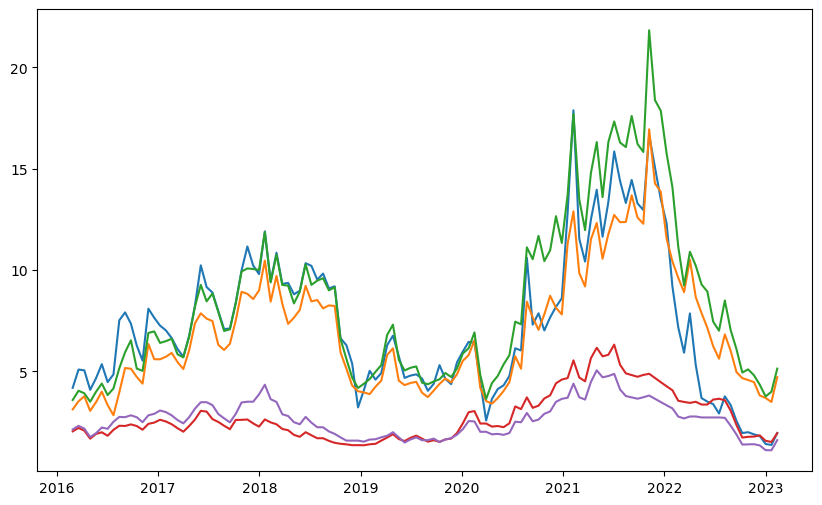

In [10]:
import matplotlib.pyplot as plt

def plot_bt(backtests):
    fig, ax = plt.subplots(figsize=(10, 6))

    for bt in backtests:
        dates = [x[0] for x in bt[0]]
        returns = [x[1] for x in bt[0]]
        label = bt[1]

        ax.plot(dates, returns, label=label)

    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.set_title('Backtest Results')

    plt.show()
plot_bt(bts)

In [ ]:
import numpy as np
#calculat the avg and std of the results
def calc_avg_std(bt):
    returns = [x[1] for x in bt]
    return np.mean(returns), np.std(returns)

for bt in bts:
    avg, std = calc_avg_std(bt[0])
    print(f'{bt[1]}: avg: {avg}, std: {std}')

